# Emoji Sentiment

Are popular emojis generally associated with positive or negative sentiments?

The file `"emoji-sentiment.csv"` provides data on the sentiment associated with various emojis.

Researchers examined 1.6 million tweets across 13 European languages. Each tweet was labeled by annotators as positive (+1), negative (-1), or neutral (0). About 4% of these tweets included emojis.

Columns include:
- `Occurrences [5...max]`: Number of times the emoji appears in the dataset.
- `Position [0...1]`: Average position of the emoji in tweets, from start (0) to end (1).
- `Neg [0...1]`: Percentage of tweets with the emoji that are 'negative'.
- `Neu [0...1]`: Percentage of tweets with the emoji that are 'neutral'.
- `Pos [0...1]`: Percentage of tweets with the emoji that are 'positive'.



In [121]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'emoji-sentiment.csv'.

# from google.colab import files
# uploaded = files.upload()

# Import Necessary libraries and read the dataset

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('emoji-sentiment.csv')

### Project Ideas:

Data Cleaning: 
- Remove unnecessary columns that are not useful for your analysis.

- Rename the remaining columns using `snake_case` (all lowercase letters with underscores between words).

New Variables:
- Add a new column called `sentiment`, where sentiment = (% positive tweets) - (% negative tweets).

- Add a `positive_flag` column that is `True` if `sentiment > 0` (or above a set threshold), otherwise `False`.

Types of questions you can now answer more easily:
- What percentage of emojis in the dataset have a positive sentiment?

- What percentage of the top 20 most popular emojis are positive?

- Which emoji (with more than 500 mentions) is the most positive?

- Which emoji (with more than 500 mentions) is the most negative?

- Where in the tweets are most emojis located (i.e. at the beginning or the end)?

- Is there a difference in the placement of positive versus negative emojis within a tweet?

In [123]:
df

,Char,Image [twemoji],Unicode codepoint,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1],Sentiment bar (c.i. 95%),Unicode name,Unicode block
0,😂,😂,0x1f602,14622,0.805,0.247,0.285,0.468,NaN,FACE WITH TEARS OF JOY,Emoticons
1,❤,❤,0x2764,8050,0.747,0.044,0.166,0.790,NaN,HEAVY BLACK HEART,Dingbats
2,♥,♥,0x2665,7144,0.754,0.035,0.272,0.693,NaN,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,😍,0x1f60d,6359,0.765,0.052,0.219,0.729,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,😭,0x1f62d,5526,0.803,0.436,0.220,0.343,NaN,LOUDLY CRYING FACE,Emoticons
...,...,...,...,...,...,...,...,...,...,...,...
746,♮,♮,0x266e,5,0.937,0.125,0.625,0.250,NaN,MUSIC NATURAL SIGN,Miscellaneous Symbols
747,🅾,🅾,0x1f17e,5,0.977,0.375,0.375,0.250,NaN,NEGATIVE SQUARED LATIN CAPITAL LETTER O,Enclosed Alphanumeric Supplement
748,🔄,🔄,0x1f504,5,0.971,0.125,0.750,0.125,NaN,ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCL...,Miscellaneous Symbols and Pictographs
749,☄,☄,0x2604,5,0.435,0.125,0.750,0.125,NaN,COMET,Miscellaneous Symbols


### Short description and statistical information about the dataset

In [124]:
# YOUR CODE HERE (add additional cells as needed)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Char                      751 non-null    object 
 1   Image [twemoji]           751 non-null    object 
 2   Unicode codepoint         751 non-null    object 
 3   Occurrences [5...max]     751 non-null    int64  
 4   Position [0...1]          751 non-null    float64
 5   Neg [0...1]               751 non-null    float64
 6   Neut [0...1]              751 non-null    float64
 7   Pos [0...1]               751 non-null    float64
 8   Sentiment bar (c.i. 95%)  0 non-null      float64
 9   Unicode name              751 non-null    object 
 10  Unicode block             751 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 64.7+ KB


,Occurrences [5...max],Position [0...1],Neg [0...1],Neut [0...1],Pos [0...1],Sentiment bar (c.i. 95%)
count,751.000000,751.000000,751.000000,751.000000,751.000000,0.0
mean,208.331558,0.665549,0.163784,0.388993,0.447237,NaN
std,804.865155,0.164450,0.137368,0.181690,0.186525,NaN
min,5.000000,0.012000,0.006000,0.014000,0.007000,NaN
25%,12.000000,0.575000,0.069500,0.254000,0.313000,NaN
50%,33.000000,0.688000,0.121000,0.349000,0.447000,NaN
75%,115.000000,0.789500,0.209000,0.500000,0.595500,NaN
max,14622.000000,0.994000,0.778000,0.987000,0.972000,NaN


### Renaming the columns(removing spaces and using snake case to rename)

In [125]:
new_name={
    'Char':'Char',
    'Image [twemoji]':'Image',
    'Unicode codepoint':'unicode_codepoint',
    'Occurrences [5...max]':'Occurrences',
    'Position [0...1]':'Position',
    'Neg [0...1]':'Neg',
    'Neut [0...1]':'Neut',
    'Pos [0...1]':'Pos',
    'Sentiment bar (c.i. 95%)':'sentiment_bar',
    'Unicode name':'name',
    'Unicode block':'block'
}

df=df.rename(columns=new_name)

### Getting emojis with atleast 500 occurrences

In [126]:
pos_500_Occ=df[df['Occurrences']>500]

### Printing out the most Positively and most Negatively used emoji

In [127]:
print("The most positive emoji with more than 500 occurrences is:\n",pos_500_Occ.query('Occurrences>500 & (Pos== Pos.max())'))
print("The most negative emoji with more than 500 occurrences is:\n",pos_500_Occ.query('Occurrences>500 & (Neg== Neg.max())'))

The most positive emoji with more than 500 occurrences is:
   Char Image unicode_codepoint  Occurrences  Position    Neg   Neut   Pos  \
1    ❤     ❤            0x2764         8050     0.747  0.044  0.166  0.79   

   sentiment_bar               name     block  
1            NaN  HEAVY BLACK HEART  Dingbats  
The most negative emoji with more than 500 occurrences is:
    Char Image unicode_codepoint  Occurrences  Position    Neg   Neut    Pos  \
14    😩     😩           0x1f629         1808     0.826  0.591  0.186  0.223   
23    😒     😒           0x1f612         1385     0.858  0.591  0.192  0.217   

    sentiment_bar           name      block  
14            NaN     WEARY FACE  Emoticons  
23            NaN  UNAMUSED FACE  Emoticons  


### Finding out the most frequent placement of emojis

In [128]:
pos=df['Position'].mean()
if(pos<0.49):
    print("Most of the emojis are at the beginning")
else:
    print("Most of the emojis are at the end")


Most of the emojis are at the end


### Creating a smaller dataset using only necessary columns for analysis

In [129]:
emoji = df[['Occurrences','Position','Neg','Neut','Pos']]
emoji

,Occurrences,Position,Neg,Neut,Pos
0,14622,0.805,0.247,0.285,0.468
1,8050,0.747,0.044,0.166,0.790
2,7144,0.754,0.035,0.272,0.693
3,6359,0.765,0.052,0.219,0.729
4,5526,0.803,0.436,0.220,0.343
...,...,...,...,...,...
746,5,0.937,0.125,0.625,0.250
747,5,0.977,0.375,0.375,0.250
748,5,0.971,0.125,0.750,0.125
749,5,0.435,0.125,0.750,0.125


### Adding a new sentiment column

In [130]:
emoji['Sentiment']=emoji.eval('Pos-Neg')
emoji

C:\Users\Dibyanshu\AppData\Local\Temp\ipykernel_15876\329991398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji['Sentiment']=emoji.eval('Pos-Neg')


,Occurrences,Position,Neg,Neut,Pos,Sentiment
0,14622,0.805,0.247,0.285,0.468,0.221
1,8050,0.747,0.044,0.166,0.790,0.746
2,7144,0.754,0.035,0.272,0.693,0.658
3,6359,0.765,0.052,0.219,0.729,0.677
4,5526,0.803,0.436,0.220,0.343,-0.093
...,...,...,...,...,...,...
746,5,0.937,0.125,0.625,0.250,0.125
747,5,0.977,0.375,0.375,0.250,-0.125
748,5,0.971,0.125,0.750,0.125,0.000
749,5,0.435,0.125,0.750,0.125,0.000


### Positive flag feature for all emojis based on sentiment

In [131]:
emoji['positive_flag']=emoji['Sentiment']>0
emoji

C:\Users\Dibyanshu\AppData\Local\Temp\ipykernel_15876\3081539767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emoji['positive_flag']=emoji['Sentiment']>0


,Occurrences,Position,Neg,Neut,Pos,Sentiment,positive_flag
0,14622,0.805,0.247,0.285,0.468,0.221,True
1,8050,0.747,0.044,0.166,0.790,0.746,True
2,7144,0.754,0.035,0.272,0.693,0.658,True
3,6359,0.765,0.052,0.219,0.729,0.677,True
4,5526,0.803,0.436,0.220,0.343,-0.093,False
...,...,...,...,...,...,...,...
746,5,0.937,0.125,0.625,0.250,0.125,True
747,5,0.977,0.375,0.375,0.250,-0.125,False
748,5,0.971,0.125,0.750,0.125,0.000,False
749,5,0.435,0.125,0.750,0.125,0.000,False


### Finding out the prcentage of emojis that are positively used

In [132]:
per_pos=emoji['positive_flag'].mean()*100
per_pos

82.42343541944075

### finding out the Percentage of top 20 emojies with percentage flag as true

In [133]:
emoji=emoji.sort_values('Occurrences',ascending=False)
print(emoji['positive_flag'].head(20).mean()*100)

90.0


### import necessary libraries and modules to train and test a model

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

### Seperating the data and target

In [135]:
X=emoji.drop('positive_flag',axis=1)
y=emoji['positive_flag']
print(X)
print(y)

     Occurrences  Position    Neg   Neut    Pos  Sentiment
0          14622     0.805  0.247  0.285  0.468      0.221
1           8050     0.747  0.044  0.166  0.790      0.746
2           7144     0.754  0.035  0.272  0.693      0.658
3           6359     0.765  0.052  0.219  0.729      0.677
4           5526     0.803  0.436  0.220  0.343     -0.093
..           ...       ...    ...    ...    ...        ...
724            5     0.574  0.125  0.375  0.500      0.375
723            5     0.510  0.125  0.625  0.250      0.125
722            5     0.786  0.125  0.250  0.625      0.500
721            5     0.853  0.125  0.750  0.125      0.000
750            5     0.458  0.125  0.750  0.125      0.000

[751 rows x 6 columns]
0       True
1       True
2       True
3       True
4      False
       ...  
724     True
723     True
722     True
721    False
750    False
Name: positive_flag, Length: 751, dtype: bool


### Train TEst split

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
print(X_train,X_test,y_train,y_test)

     Occurrences  Position    Neg   Neut    Pos  Sentiment
93           295     0.807  0.299  0.262  0.440      0.141
432           23     0.585  0.346  0.269  0.385      0.039
367           34     0.623  0.108  0.432  0.459      0.351
487           17     0.870  0.050  0.550  0.400      0.350
284           57     0.633  0.167  0.367  0.467      0.300
..           ...       ...    ...    ...    ...        ...
71           410     0.759  0.228  0.482  0.291      0.063
105          270     0.883  0.553  0.282  0.165     -0.388
270           62     0.638  0.138  0.492  0.369      0.231
430           23     0.584  0.231  0.269  0.500      0.269
102          274     0.801  0.029  0.625  0.347      0.318

[450 rows x 6 columns]      Occurrences  Position    Neg   Neut    Pos  Sentiment
472           19     0.780  0.364  0.227  0.409      0.045
357           36     0.047  0.026  0.692  0.282      0.256
133          191     0.760  0.144  0.402  0.454      0.310
250           72     0.846  0.33

### Model Prediction

In [180]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(pred)


[ True  True  True False  True  True  True  True False  True False  True
  True  True  True  True False False  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True False  True  True  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  T

### Model Reports

In [181]:
confusion_matix=confusion_matrix(y_test,pred)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred)
recall=recall_score(y_test,pred)
f1=f1_score(y_test,pred)
classification=classification_report(y_test,pred)


In [182]:
print("confusion matrix:\n\n",confusion_matix)
print("\nThe acuuracy score:",accuracy)
print("\nThe precision score:",precision)
print("\nThe recall score:",recall)
print("\nThe f1 score:",f1)
print("\nThe classification report:\n",classification)


confusion matrix:

 [[ 45   0]
 [  3 253]]

The acuuracy score: 0.9900332225913622

The precision score: 1.0

The recall score: 0.98828125

The f1 score: 0.9941060903732809

The classification report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97        45
        True       1.00      0.99      0.99       256

    accuracy                           0.99       301
   macro avg       0.97      0.99      0.98       301
weighted avg       0.99      0.99      0.99       301



### Plots

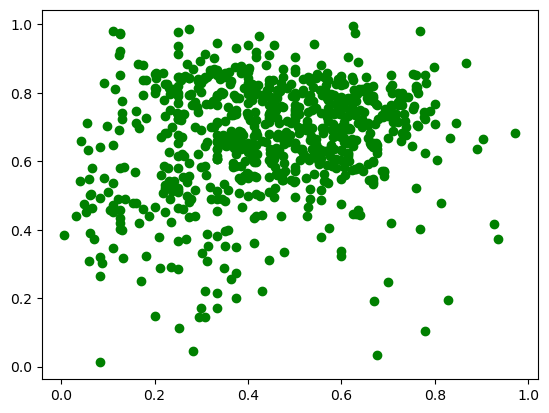

In [186]:
plt.scatter(emoji['Pos'],emoji['Position'],c='green')



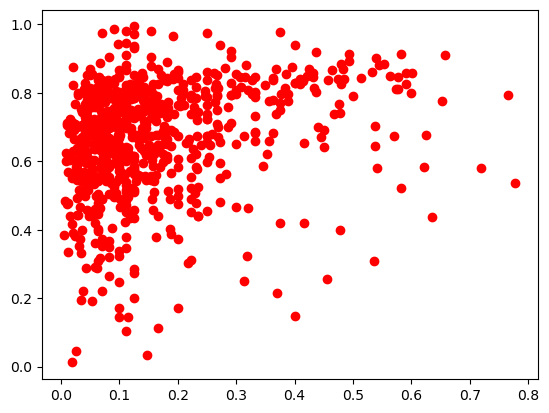

In [187]:
plt.scatter(emoji['Neg'],emoji['Position'],c='red',)


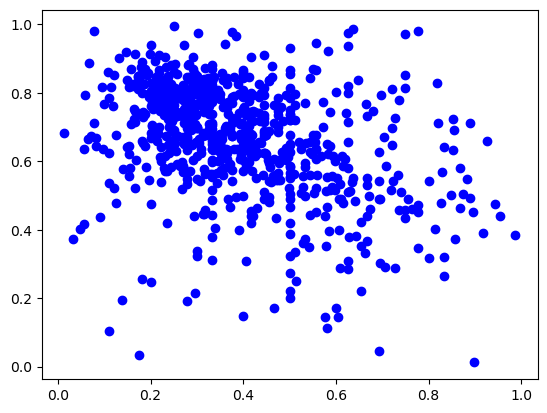

In [188]:
plt.scatter(emoji['Neut'],emoji['Position'],c='blue',)

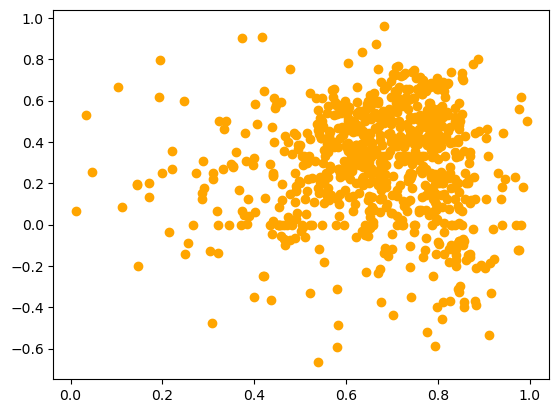

In [175]:
plt.scatter(emoji['Position'],emoji['Sentiment'],c='orange',)

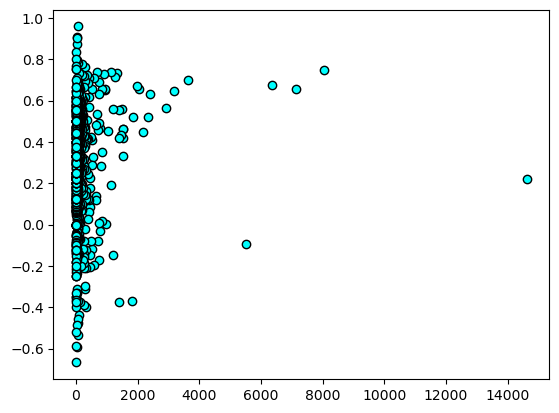

In [179]:
plt.scatter(emoji['Occurrences'],emoji['Sentiment'],c='cyan',edgecolors='black')


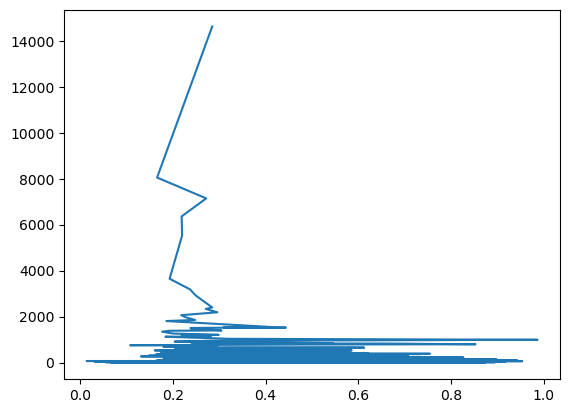

In [214]:
plt.plot(emoji['Neut'],emoji['Occurrences'])
